In [1]:
import numpy as np
import matplotlib.pyplot as pl

We start by importing NumPy which you should be familiar with from the [previous tutorial](3_NumPy_Basics.ipynb). The next library introduced is called [MatPlotLib](http://matplotlib.org/) which is the roughly the Python equivalent of Matlab's plotting functionality. Think of it as a Mathematical Plotting Library.

Let's use NumPy to create a Gaussian distribution and then plot it.

In [2]:
fig, ax = pl.subplots(2,2, figsize=(8,6))

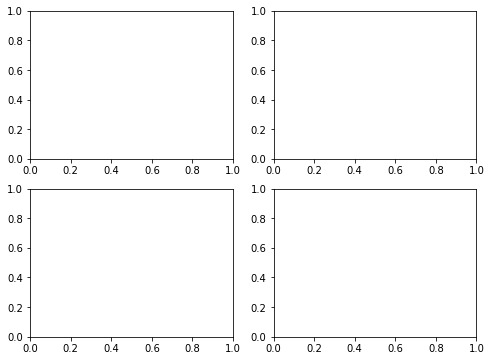

In [3]:
fig

In [4]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa59316e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ffa56fd1c10>]], dtype=object)

In [5]:
ax[0,0]

We make a figure object that allows us to draw things inside of it. This is our canvas which lets us save the entire thing as an image or a PDF to our computer.

We also split up this canvas to a 2x2 grid and tell matplotlib that we want 4 ``axes`` object. Each ``axes`` object is a separate plot that we can draw into. For the purposes of the exercise, we'll demonstrate the different linestyles in each subplot. The ordering is by setting ``[0,0]`` to the top-left and ``[n,m]`` to the bottom-right. As this returns a 2D array, you access each ``axis`` by ``ax[i,j]`` notation.

In [6]:
# create x values from [0,99)
x = np.arange(100)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [7]:
# generate y values based on a Gaussian PDF
y1 = np.random.normal(loc=0.0, scale=1.0, size=x.size) # mu=0.0, sigma=1.0
y2 = np.random.normal(loc=2.0, scale=2.0, size=x.size) # mu=1.0, sigma=2.0
y3 = np.random.normal(loc=-2.0, scale=0.5, size=x.size)# mu=-1.0, sigma=0.5
y1[:20] # just show the first 20 as an example

array([-0.27093535, -2.04168283, -0.97306979,  1.98569081, -0.23702269,
        0.09540266,  0.08433753, -0.41627919,  0.24851514, -0.0846028 ,
       -0.2139663 , -1.22619933, -0.74545638,  0.99751446,  1.63710214,
        1.70493702,  0.24116253,  0.97810207, -1.33984987,  1.1213195 ])

Now, for each axes, we want to draw one of the four different example linestyles so you can get an idea of how this works.

In [8]:
for axis, linestyle in zip(ax.reshape(-1), ['-', '--', '-.', ':']):
    axis.plot(x, y1, color="red", linewidth=1.0, linestyle=linestyle)
    axis.plot(x, y2, color="blue", linewidth=1.0, linestyle=linestyle)
    axis.plot(x, y3, color="green", linewidth=1.0, linestyle=linestyle)
    axis.set_title('line style: '+linestyle)
    axis.set_xlabel("$x$")
    axis.set_ylabel("$e^{-\\frac{(x-\\mu)^2}{2\\sigma}}$")

You can see that we use ``ax.reshape(-1)`` which flattens our ``axes`` object, so we can just loop over all 4 entries without nested loops, and we combine this with the different linestyles we want to look at: ``['-', '--', '-.', ':']``.

So for each axis, we plot ``y1``, ``y2``, and ``y3`` with different colors for the same linestyle and then set the title. Let's look at the plots we just made:

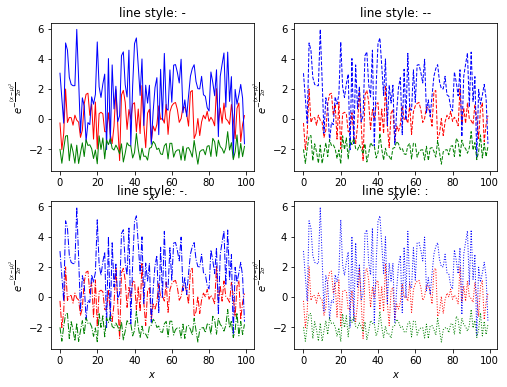

In [9]:
fig

But as a perfectionist, I dislike that things look like they overlap... let's fix this using [``matplotlib.tight_layout()``](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.tight_layout)

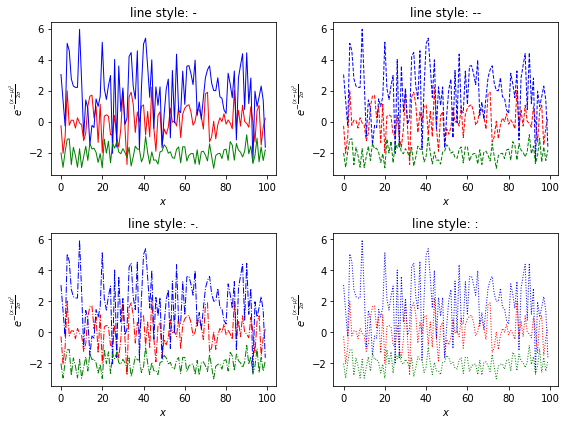

In [10]:
pl.tight_layout() # a nice command that just fixes overlaps
fig

In [11]:
pl.clf() # clear current figure

# Sharing Axes

A nice example to demonstrate another feature of NumPy and Matplotlib together for analysis and visualization is to make one of my favorite kinds of plots

In [12]:
data_2d = np.random.multivariate_normal([10, 5], [[9,3],[3,18]], size=1000000)

Draw ``size=1000000`` random samples from a multivariate normal distribution. We first specify the means: ``[10, 5]``, then the covariance matrix of the distribution ``[[3,2],[2,3]]``. What does this look like?

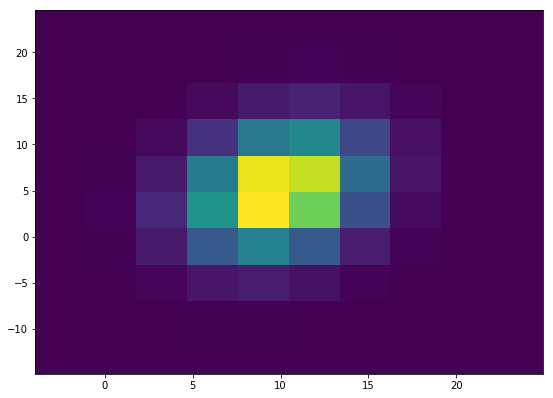

In [13]:
pl.hist2d(data_2d[:, 0], data_2d[:,1])
pl.show()

Oh, that looks weird, maybe we should increase the binning.

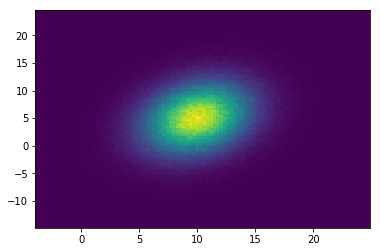

In [14]:
pl.hist2d(data_2d[:, 0], data_2d[:, 1], bins=100)
pl.show()

And we can understand the underlying histograms that lie alone each axis.

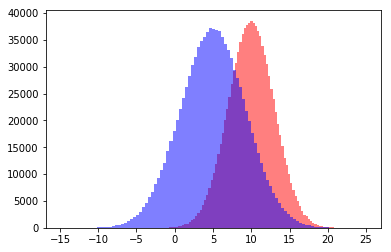

In [15]:
fig, ax = pl.subplots()
ax.hist(data_2d[:,0], bins=100, color="red", alpha=0.5) # draw x-histogram
ax.hist(data_2d[:,1], bins=100, color="blue", alpha=0.5) # draw y-histogram
pl.show()

In [16]:
pl.clf()

Now let's combine the these plots in a way that teaches someone what a 2D histogram represents along each dimension. In order to get our histogram for the ``y-axis`` "rotated", we just need to specify a ``orientiation='horizontal'`` when drawing the histogram.

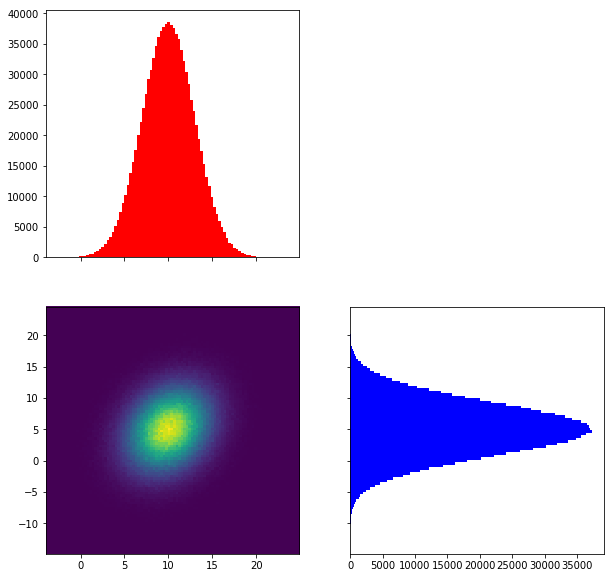

In [17]:
fig, ax = pl.subplots(2,2, sharex='col', sharey='row', figsize=(10,10))

# draw x-histogram at top-left
ax[0,0].hist(data_2d[:,0], bins=100, color="red") # draw x-histogram
# draw y-histogram at bottom-right
ax[1,1].hist(data_2d[:,1], bins=100, color="blue",orientation="horizontal")
# draw 2d histogram at bottom-left
ax[1,0].hist2d(data_2d[:, 0], data_2d[:, 1], bins=100)
# delete top-right
fig.delaxes(ax[0,1])
fig

But again, I am not a huge fan of the whitespace between subplots, so I run the following

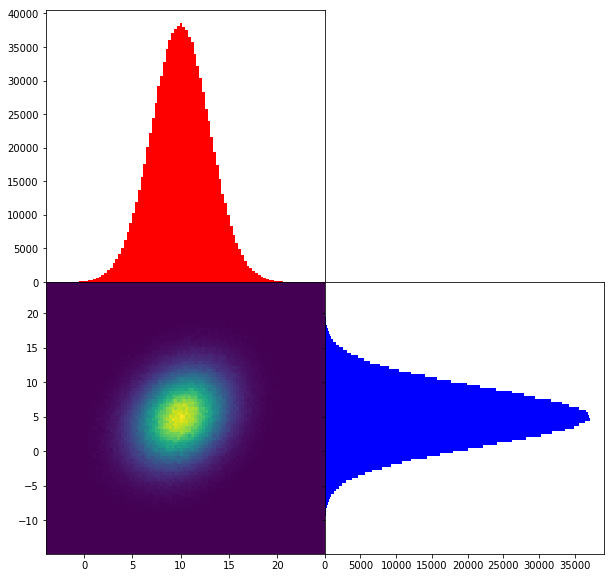

In [18]:
pl.subplots_adjust(wspace=0, hspace=0)
fig